In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# f = np.load('simclr_predictions.npz')
kyle = np.load('/input/Self-supervised SimCLR with MLP.npz', allow_pickle=True)

In [ ]:
for k in kyle.keys(): print(k)

accuracies
info


In [ ]:
kyle['info']

array({'array dim0': "run ID's", 'array dim1': 'latent space dimension', 'array dim2': 'mean accuracy over 5 k-folded runs', 'array dim3': 'mean standard deviation over 5 k-folded runs'},
      dtype=object)

In [ ]:
print('Shape:', kyle['accuracies'].shape)
print(kyle['accuracies'])

Shape: (5, 4)
[[2.490e+02 6.000e+00 7.777e+01 4.500e-01]
 [2.450e+02 8.000e+00 8.088e+01 4.000e-01]
 [2.500e+02 1.600e+01 8.431e+01 2.000e-01]
 [2.470e+02 3.200e+01 8.599e+01 2.900e-01]
 [2.650e+02 6.400e+01 8.772e+01 1.600e-01]]


In [ ]:
dims = [2, 4, 6, 8, 16, 32, 64]
x_val = []
y_val = []
y_err = []
for d in dims:
  x_val.append(d)
  if d in kyle['accuracies'][:,1].flatten():
    d_idx = np.where(kyle['accuracies']==d)[0][0]
    y_val.append(kyle['accuracies'][d_idx, 2])
    y_err.append(kyle['accuracies'][d_idx, 3])
  else:
    y_val.append(0)
    y_err.append(0)


In [ ]:
x_val

[2, 4, 6, 8, 16, 32, 64]

In [ ]:
y_val

[0, 0, 77.77, 80.88, 84.31, 85.99, 87.72]

In [ ]:
y_err

[0, 0, 0.45, 0.4, 0.2, 0.29, 0.16]

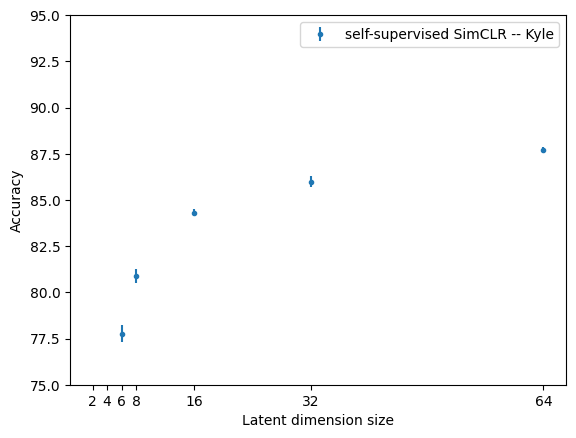

In [ ]:
plt.errorbar(x_val, y_val, y_err, fmt='.', label='self-supervised SimCLR -- Kyle')
plt.ylim(75, 95)
plt.xlabel('Latent dimension size')
plt.ylabel('Accuracy')
plt.xticks(x_val)
plt.legend()